In [1]:
# import libs
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
set = pd.read_csv('./gmean-set.csv')
set['Month-Year'] = pd.to_datetime(set['Month-Year'])
set.set_index('Month-Year', inplace=True)
set = set[set.index.year >= 2008]
last_quarter = set.iloc[-1, -1]

In [3]:
interval = '1d'
start = '2008-8-1'
end = '2024-8-1'

In [4]:
stock = yf.Ticker('LANNA.BK')
stock_df = stock.history(interval='1d',start=start,end=end)
stock_df.index = pd.to_datetime(stock_df.index.strftime('%Y-%m-%d'))
stock_df.dropna(inplace=True)
stock_df['rets'] = stock_df['Close'].pct_change()

In [5]:
stock_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rets
Date,,,,,,,,
2008-08-01,2.675577,2.675577,2.617412,2.636800,116850,0.0,0.0,NaN
2008-08-04,2.636800,2.636800,2.578635,2.598023,174750,0.0,0.0,-0.014706
2008-08-05,2.578636,2.578636,2.423530,2.423530,1514400,0.0,0.0,-0.067164
2008-08-06,2.462305,2.462305,2.365364,2.404141,421350,0.0,0.0,-0.008000
2008-08-07,2.404141,2.559247,2.404141,2.520470,1468200,0.0,0.0,0.048387
...,...,...,...,...,...,...,...,...
2024-07-24,14.000000,14.100000,13.900000,13.900000,863500,0.0,0.0,-0.007143
2024-07-25,13.900000,14.000000,13.700000,13.800000,744600,0.0,0.0,-0.007194
2024-07-26,13.800000,14.100000,13.800000,14.000000,1321800,0.0,0.0,0.014493


In [6]:
set

,SET,log-SET,gmean-SET,scaled-SET,quarter
Month-Year,,,,,
2008-01-01,1.86,0.620576,2.157502,0.861569,2.0
2008-02-01,2.00,0.693147,2.156818,0.926998,2.0
2008-03-01,1.87,0.625938,2.155536,0.867018,2.0
2008-04-01,1.91,0.647103,2.154454,0.886091,2.0
2008-05-01,1.84,0.609766,2.153050,0.854045,2.0
...,...,...,...,...,...
2024-03-01,1.33,0.285179,1.979151,0.671386,0.0
2024-04-01,1.32,0.277632,1.977301,0.666953,0.0
2024-05-01,1.26,0.231112,1.975249,0.637232,0.0


In [7]:
from sklearn.cluster import KMeans

In [8]:
data = set['scaled-SET'].loc['2008-01-01': '2020-07-01	'].values.reshape(-1, 1)

In [9]:
# Number of clusters
k = 5

# Applying K-means
kmeans = KMeans(n_clusters=k, random_state=42)

In [10]:
kmeans.fit(data)

C:\Users\User\anaconda3\envs\AIML\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [11]:
set['cluster'] = kmeans.predict(set['scaled-SET'].values.reshape(-1, 1))

In [12]:
set['cluster']

Month-Year
2008-01-01    1
2008-02-01    1
2008-03-01    1
2008-04-01    1
2008-05-01    1
             ..
2024-03-01    4
2024-04-01    4
2024-05-01    4
2024-06-01    4
2024-07-01    4
Name: cluster, Length: 199, dtype: int32

In [13]:
# Sort the centroids
centroids = kmeans.cluster_centers_.flatten()
sorted_centroids = np.sort(centroids)

# Reassign the labels based on sorted centroids
sorted_labels = np.zeros_like(set['cluster'])
for i, centroid in enumerate(sorted_centroids):
    sorted_labels[set['cluster'] == np.where(centroids == centroid)[0][0]] = i
set['sorted_cluster'] = sorted_labels

In [14]:
set['sorted_cluster'].value_counts()

sorted_cluster
2    74
3    50
1    47
4    21
0     7
Name: count, dtype: int64

In [15]:
stock_df['cluster'] = set['sorted_cluster']

In [16]:
stock_df['cluster'].fillna(method='ffill', inplace=True)

In [17]:
stock_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rets,cluster
Date,,,,,,,,,
2008-08-01,2.675577,2.675577,2.617412,2.636800,116850,0.0,0.0,NaN,1.0
2008-08-04,2.636800,2.636800,2.578635,2.598023,174750,0.0,0.0,-0.014706,1.0
2008-08-05,2.578636,2.578636,2.423530,2.423530,1514400,0.0,0.0,-0.067164,1.0
2008-08-06,2.462305,2.462305,2.365364,2.404141,421350,0.0,0.0,-0.008000,1.0
2008-08-07,2.404141,2.559247,2.404141,2.520470,1468200,0.0,0.0,0.048387,1.0
...,...,...,...,...,...,...,...,...,...
2024-07-24,14.000000,14.100000,13.900000,13.900000,863500,0.0,0.0,-0.007143,1.0
2024-07-25,13.900000,14.000000,13.700000,13.800000,744600,0.0,0.0,-0.007194,1.0
2024-07-26,13.800000,14.100000,13.800000,14.000000,1321800,0.0,0.0,0.014493,1.0


In [18]:
import seaborn as sns

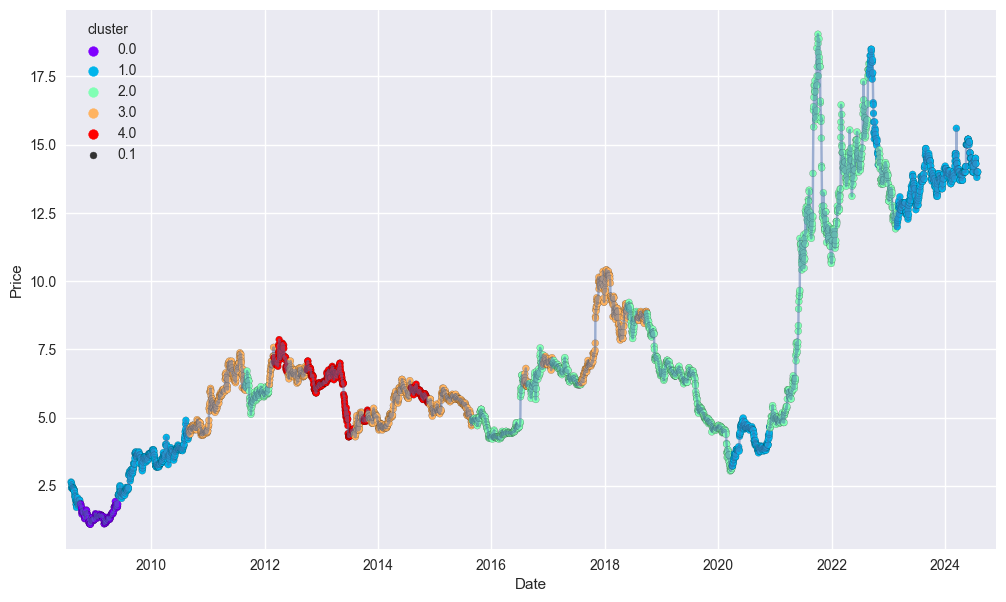

In [19]:
plt.figure(figsize=(12, 7))

sns.lineplot(data=stock_df, x=stock_df.index, y='Close', alpha=0.5)
sns.scatterplot(data=stock_df, x=stock_df.index, y='Close', hue='cluster', size=0.1, palette="rainbow", linewidth=0.1, edgecolor='k')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim([stock_df.index.min() - pd.Timedelta(days=30), stock_df.index.max() + pd.Timedelta(days=120)]);